<h1> Beer Consumption in Brazil </h1>
<p>This workbook has been created with the following objectives</p>
<ol>
    <li> Understand Pytorch and its applications</li>
    <li> Develop code for implementing Linear Regression using SGD and Deep Learning (<b> Neural Networks </b>)</li>
    <li> At the end, compare with basic Linear Regression using Scikit Learn </li>
</ol>
<p> This tutorial uses the Beer Consumption in Sao Paolo data set from <a href="https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo">Kaggle Dataset </a>. The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average). </p>
    
<p>This is the first in the series of notebooks that will demonstrate how Machine Learning can be implemented using Torch framework in Python. Also, this will try to establish if it is really required to implement a Neural Network (which uses a lot of compute) when the problem at hand is quite simple and a simple OLS can do the job </p>


In [1]:
# Import the standard Python libraries - Pandas, Numpy and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters


# Import Torch
import torch
from torch.autograd import Variable
from torchsummary import summary

#Import Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Import visualization library - Seaborn.
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,6)
sns.set_style("whitegrid")
np.random.seed(12345)
torch.manual_seed(12345)

register_matplotlib_converters()

In [3]:
# Read data from the csv file into a Pandas dataframe
data = pd.read_csv("BeerConsumption_v1.csv", decimal=',', skiprows=1, names = ['Date','AvgTempC','MinTempC','MaxTempC','PrecipitationMM','Weekend','BeerConsumedL'])

In [4]:
# Check the first few rows to see if data is correctly imported
data.head()

,Date,AvgTempC,MinTempC,MaxTempC,PrecipitationMM,Weekend,BeerConsumedL
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [5]:
# Check the bottom few rows
data.tail()

,Date,AvgTempC,MinTempC,MaxTempC,PrecipitationMM,Weekend,BeerConsumedL
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for the data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Date               365 non-null object
AvgTempC           365 non-null float64
MinTempC           365 non-null float64
MaxTempC           365 non-null float64
PrecipitationMM    365 non-null float64
Weekend            365 non-null float64
BeerConsumedL      365 non-null object
dtypes: float64(5), object(2)
memory usage: 51.5+ KB


<h2> Handle Missing values </h2>

In [7]:
# Drop the rows with NA. This seems to be a problem in the csv file.
data.dropna(inplace=True)

In [8]:
data.shape

(365, 7)

<h2> Data Preparation </h2>

In [9]:
# The first column is a date. Convert the date to right data type
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [10]:
# Extract month out of Data
data['Month'] = data['Date'].apply(lambda x: x.strftime('%B'))

In [11]:
# Function to interpret the day of week as a categorical variable
def day_week(x):
    if x==0:
        return 'Monday'
    if x==1:
        return 'Tuesday'
    if x==2:
        return 'Wednesday'
    if x==3:
        return 'Thursday'
    if x==4:
        return 'Friday'
    if x==5:
        return 'Saturday'
    if x==6:
        return 'Sunday'
data['Day'] = data['Date'].apply(lambda x: day_week(x.dayofweek))

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 9 columns):
Date               365 non-null datetime64[ns]
AvgTempC           365 non-null float64
MinTempC           365 non-null float64
MaxTempC           365 non-null float64
PrecipitationMM    365 non-null float64
Weekend            365 non-null float64
BeerConsumedL      365 non-null object
Month              365 non-null object
Day                365 non-null object
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 28.5+ KB


In [13]:
# Explicitly convert values to numeric
data['BeerConsumedL'] = pd.to_numeric(data['BeerConsumedL'])
data['Weekend'] = data['Weekend'].astype(int)

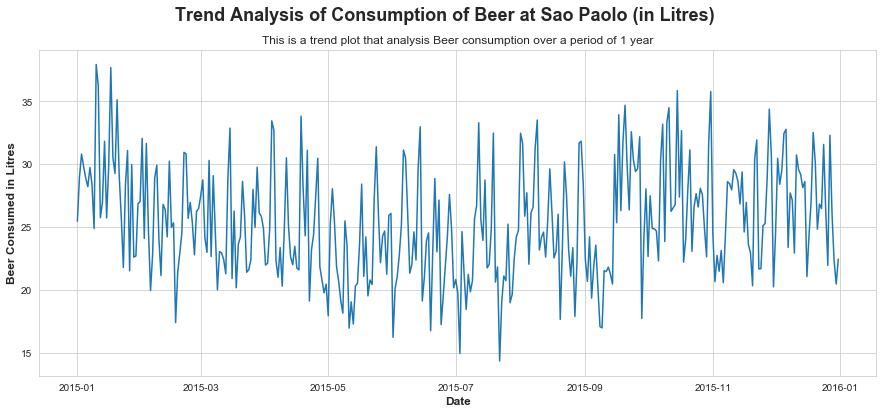

In [14]:
# Trend plot for the date wise consumption of beer
sns.lineplot(x=data['Date'],y=data['BeerConsumedL'])
plt.xlabel("Date",fontsize=12, fontweight='bold')
plt.ylabel("Beer Consumed in Litres",fontsize=12, fontweight='bold')
plt.suptitle("Trend Analysis of Consumption of Beer at Sao Paolo (in Litres)",fontsize=18, fontweight='bold')
plt.title("This is a trend plot that analysis Beer consumption over a period of 1 year")
plt.show()

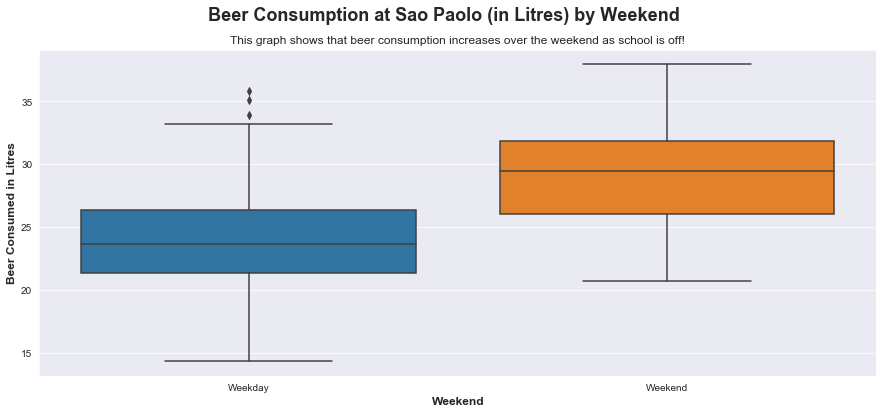

In [15]:
# Compare beer consumption between Weekend and Weekday
sns.set_style("darkgrid")
sns.boxplot(data['Weekend'].map({0:'Weekday',1:'Weekend'}),data['BeerConsumedL'])
plt.xlabel("Weekend",fontsize=12, fontweight='bold')
plt.ylabel("Beer Consumed in Litres",fontsize=12, fontweight='bold')
plt.suptitle("Beer Consumption at Sao Paolo (in Litres) by Weekend",fontsize=18, fontweight='bold')
plt.title("This graph shows that beer consumption increases over the weekend as school is off!")
plt.show()

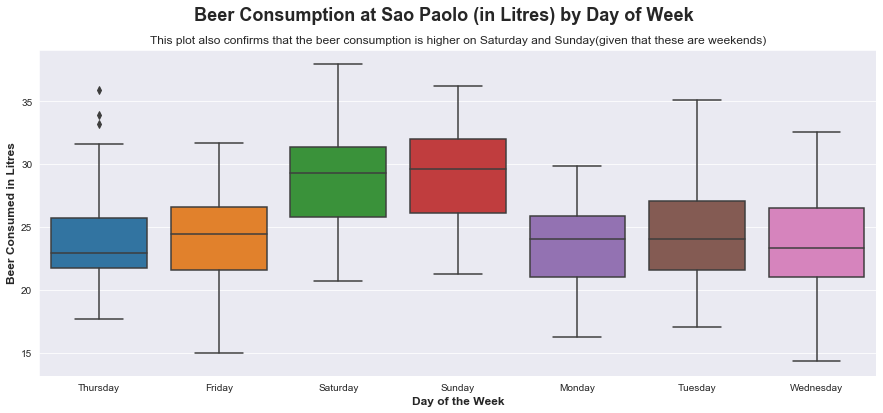

In [16]:
sns.set_style("darkgrid")
sns.boxplot(data['Day'],data['BeerConsumedL'])
plt.xlabel("Day of the Week",fontsize=12, fontweight='bold')
plt.ylabel("Beer Consumed in Litres",fontsize=12, fontweight='bold')
plt.suptitle("Beer Consumption at Sao Paolo (in Litres) by Day of Week",fontsize=18, fontweight='bold')
plt.title("This plot also confirms that the beer consumption is higher on Saturday and Sunday(given that these are weekends)")
plt.show()

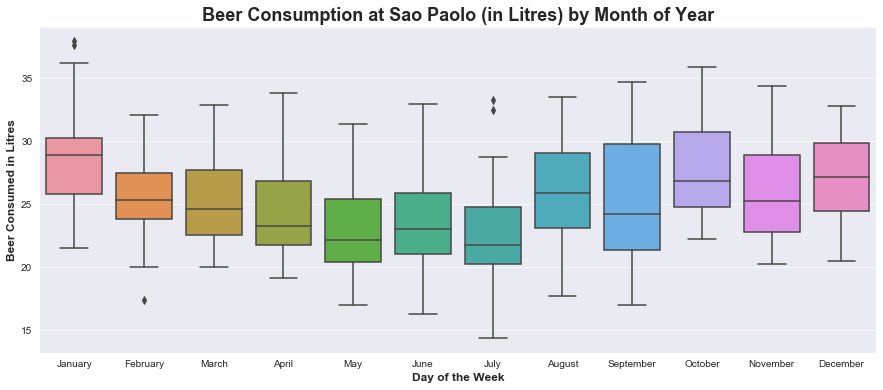

In [17]:
# Analysis by the month
sns.set_style("darkgrid")
sns.boxplot(data['Month'],data['BeerConsumedL'])
plt.xlabel("Day of the Week",fontsize=12, fontweight='bold')
plt.ylabel("Beer Consumed in Litres",fontsize=12, fontweight='bold')
plt.title("Beer Consumption at Sao Paolo (in Litres) by Month of Year",fontsize=18, fontweight='bold')
plt.show()

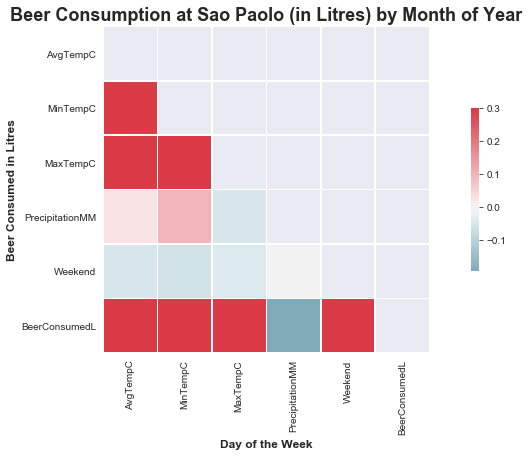

In [18]:
# Heatmap
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = data.corr()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xlabel("Day of the Week",fontsize=12, fontweight='bold')
plt.ylabel("Beer Consumed in Litres",fontsize=12, fontweight='bold')
plt.title("Beer Consumption at Sao Paolo (in Litres) by Month of Year",fontsize=18, fontweight='bold')
plt.show()

<p> From the exploratory data analysis above, it is clear that beer consumption increases over the weekends and is high during the summer months in Brazil (it is in Southern Hemisphere). Also there seems to be strong multi-collinearity among independent variables and there is a requirement for PCA to remove multicollinearity. I will not be doing PCA here as the number of variables are low.</p>

In [19]:
# Prepare data - convert categorical variables to columns
data_f = pd.get_dummies(data,columns=['Month','Day'], drop_first=True)

In [20]:
data_f.head()

,Date,AvgTempC,MinTempC,MaxTempC,PrecipitationMM,Weekend,BeerConsumedL,Month_August,Month_December,Month_February,...,Month_May,Month_November,Month_October,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
# Using a train test split of 75:25, split the data frame
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(data_f.drop(['Date','BeerConsumedL'], axis=1),data_f['BeerConsumedL'], test_size = 0.25)

In [22]:
print(df_test_x.shape)

(92, 22)


<h4> Scaling </h4>
<p> Scaling the variables to bring them to a standard scale. Compute z values 
    <img src="http://latex.codecogs.com/gif.latex?Zscore=[x-mean(x)]/std(x)" border="0"/>
</p>

In [23]:
#Using Standard Scaler
scaler = StandardScaler()
scaler.fit(df_train_x, df_train_y)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
# Transform variables using the Standard Scaler
df_train_x = scaler.transform(df_train_x)
df_test_x = scaler.transform(df_test_x)

In [25]:
# Convert to Tensors
df_train_xt = torch.from_numpy(df_train_x)
df_test_xt = torch.from_numpy(df_test_x)

df_train_yt = torch.from_numpy(df_train_y.values)
df_test_yt = torch.from_numpy(df_test_y.values)

In [26]:
# Define the Linear Regression Model class that inherits the torch.nn.Module class.
# This implements a single layer which implements torch.nn.Linear model.
class LinearRegressionModel(torch.nn.Module): 
  
    def __init__(self, in_size, out_size): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(in_size, out_size) 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred

In [27]:
# Loss Function is the Mean Squared Error
loss_fn = torch.nn.MSELoss()

# Instantiate the LinearRegressionModel Class
lin_model = LinearRegressionModel(df_train_xt.shape[1],1)

# Optimizer is the Stochastic Gradient Descent with a learning rate of 0.01
optimizer = torch.optim.SGD(lin_model.parameters(), lr = 0.01)

In [28]:
# Now there will 500 epochs during which the model will do a forward and backward pass/propagation and
# attempt to learn the weights while minimizing on MSE
epochs = 500
losses = []
for epoch in range(epochs): 
  
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    pred_y = lin_model.forward(df_train_xt.float()) 
  
    #print(pred_y)
    # Compute and print loss 
    loss = loss_fn(pred_y.float(), df_train_yt.float())
    losses.append(loss)
  
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer.zero_grad()
    
    loss.backward() 
    optimizer.step() 
    print('epoch {}, loss {}'.format(epoch, loss.data))

C:\Users\amitg\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([273])) that is different to the input size (torch.Size([273, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 661.263916015625
epoch 1, loss 635.77197265625
epoch 2, loss 611.2931518554688
epoch 3, loss 587.7867431640625
epoch 4, loss 565.2139282226562
epoch 5, loss 543.5374145507812
epoch 6, loss 522.7213134765625
epoch 7, loss 502.7313537597656
epoch 8, loss 483.5345458984375
epoch 9, loss 465.0993347167969
epoch 10, loss 447.39532470703125
epoch 11, loss 430.3934631347656
epoch 12, loss 414.0657958984375
epoch 13, loss 398.3855285644531
epoch 14, loss 383.3268737792969
epoch 15, loss 368.8651428222656
epoch 16, loss 354.97662353515625
epoch 17, loss 341.6385803222656
epoch 18, loss 328.8291320800781
epoch 19, loss 316.52728271484375
epoch 20, loss 304.7129211425781
epoch 21, loss 293.3666687011719
epoch 22, loss 282.469970703125
epoch 23, loss 272.0049743652344
epoch 24, loss 261.95458984375
epoch 25, loss 252.30235290527344
epoch 26, loss 243.032470703125
epoch 27, loss 234.1298065185547
epoch 28, loss 225.57980346679688
epoch 29, loss 217.3684844970703
epoch 30, loss 209.482

epoch 241, loss 18.274927139282227
epoch 242, loss 18.273420333862305
epoch 243, loss 18.271974563598633
epoch 244, loss 18.270584106445312
epoch 245, loss 18.269250869750977
epoch 246, loss 18.267969131469727
epoch 247, loss 18.266738891601562
epoch 248, loss 18.26555633544922
epoch 249, loss 18.264419555664062
epoch 250, loss 18.263330459594727
epoch 251, loss 18.26228141784668
epoch 252, loss 18.261276245117188
epoch 253, loss 18.26030921936035
epoch 254, loss 18.259382247924805
epoch 255, loss 18.25849151611328
epoch 256, loss 18.25763511657715
epoch 257, loss 18.256811141967773
epoch 258, loss 18.25602149963379
epoch 259, loss 18.25526237487793
epoch 260, loss 18.254533767700195
epoch 261, loss 18.253833770751953
epoch 262, loss 18.253162384033203
epoch 263, loss 18.25251579284668
epoch 264, loss 18.251895904541016
epoch 265, loss 18.251300811767578
epoch 266, loss 18.250728607177734
epoch 267, loss 18.25017738342285
epoch 268, loss 18.249649047851562
epoch 269, loss 18.2491436004

epoch 477, loss 18.23666763305664
epoch 478, loss 18.23666763305664
epoch 479, loss 18.23666763305664
epoch 480, loss 18.236665725708008
epoch 481, loss 18.236665725708008
epoch 482, loss 18.236665725708008
epoch 483, loss 18.236663818359375
epoch 484, loss 18.236663818359375
epoch 485, loss 18.236663818359375
epoch 486, loss 18.236661911010742
epoch 487, loss 18.236661911010742
epoch 488, loss 18.236661911010742
epoch 489, loss 18.236661911010742
epoch 490, loss 18.23666000366211
epoch 491, loss 18.23666000366211
epoch 492, loss 18.23666000366211
epoch 493, loss 18.236658096313477
epoch 494, loss 18.236658096313477
epoch 495, loss 18.236658096313477
epoch 496, loss 18.236658096313477
epoch 497, loss 18.236656188964844
epoch 498, loss 18.236656188964844
epoch 499, loss 18.236656188964844


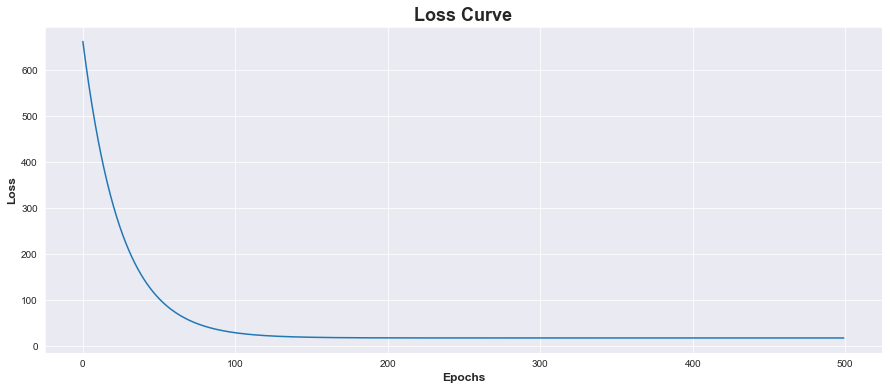

In [29]:
# Plot the loss curve
plt.plot(range(epochs), losses),
plt.xlabel("Epochs",  fontsize=12, fontweight='bold')
plt.ylabel("Loss",  fontsize=12, fontweight='bold')
plt.title("Loss Curve", fontsize=18, fontweight='bold')
plt.show()

In [30]:
# Print model summary
summary(lin_model, input_size=(3,df_train_x.shape[0],df_train_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 3, 273, 1]              23
Total params: 23
Trainable params: 23
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.07
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


In [31]:
# Score on the test set
pred_y = lin_model(df_test_xt.float())
y_hat = pred_y.detach().numpy()
y_true = df_test_yt.detach().numpy()

In [32]:
# Test set MSE
mean_squared_error(y_pred=y_hat, y_true=y_true)

22.649221094040385

In [33]:
# Identify the weights
for p in lin_model.parameters():
    x = p.data.numpy()
    break

In [34]:
# Define the column names for the parameters
colnames = data_f.drop(['Date','BeerConsumedL'],axis=1).columns

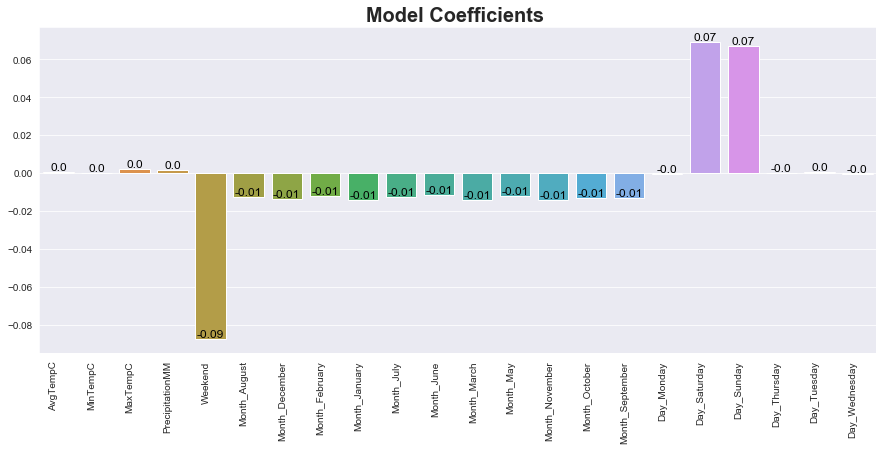

In [35]:
# Plot the coefficients
plt.xticks(rotation=90, ha='right')
plt.title("Model Coefficients ", fontweight='bold', fontsize=20)
ax = plt.gca()
plot = sns.barplot(colnames,x[0])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), np.round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')

<h2> Implement Linear Regression using OLS </h2>
<p> Now it is time to implement the regular Linear Regression from Scikit Learn which implements the Ordinary Least Squares algorithm </p>

In [36]:
# Define a Linear Model
model = LinearRegression()

In [37]:
# Fit the model on training set
model.fit(df_train_x, df_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# print MSE for the training set. 
mean_squared_error(y_pred=model.predict(df_train_x),y_true=df_train_y)

4.97372115964795

In [39]:
# Predict on test set
pred = model.predict(df_test_x)

In [40]:
# Print MSE for test set
mean_squared_error(y_pred=pred,y_true=df_test_y)

5.359047932554305

<h1> Conclusion </h1>
<p class='lead'>From the above analysis, it is clear that an Ordinary Least Squares algorithm does a better job (lower MSE) and less lines of code as compared to the Pytorch NN method. However, this was a simple problem and a simple solution would be better. But for complex problems, maybe the Pytorch NN will be able to create a better model </p>
